## Vagner Machado - Data Analytics - Fall 2020

## HomeWork 1 Due at Mid-night 10/7/2020

### This homework will cover the following skills set
* Using sql 
* Checking for null values and outliers
* Calculate simple statistics using both SQL and Pandas 
* Calculate skew and correlation
* Basic Data Visualization
* How to fix missing values

## Late Policy: Take off 50% after one day, 80% after two days

**Make sure you have pandasql installed. If not, make sure you run the code in the following cell**

In [1]:
import os
try:
    import pandasql as ps
except:
    print("Failed in import pandasql")
    os.system("pip install pandasql")

**Import all standard libaries**

In [2]:
import pandas as pd
import pandasql as ps
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Car Crashes dataset Number 2 ##

In [3]:
crash = pd.read_csv("car_crashes2.csv")
print(crash.shape)
crash.head()

(52, 10)


,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,state,region,division
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,South,East South Central
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,West,Pacific
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,West,Mountain
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,South,West South Central
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,West,Pacific


* accidents is the total number of crashes for each state
* speeding is the average speeding in each state

In [4]:
crash.region.unique()

array(['South', 'West', 'Northeast', 'Midwest', 'Territory'], dtype=object)

In [5]:
crash.division.unique()

array(['East South Central', 'Pacific', 'Mountain', 'West South Central',
       'New England', 'South Atlantic', 'East North Central',
       'West North Central', 'Middle Atlantic', 'Territory'], dtype=object)

## Question 1. Check if there are any null or NA

In [6]:
crash.isnull().any()

accidents         False
speeding           True
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 2. Remove any rows that has null or NA

In [7]:
#print all rows with missing speeding
print('Rows with missing speeding data\n',crash[np.isnan(crash['speeding'])].speeding)

crash = crash[~np.isnan(crash['speeding'])]

#verify that there are no null values left
crash.isnull().any()

Rows with missing speeding data
 32   NaN
Name: speeding, dtype: float64


accidents         False
speeding          False
alcohol           False
not_distracted    False
no_previous       False
ins_premium       False
ins_losses        False
state             False
region            False
division          False
dtype: bool

## Question 3. Check if there is any outliers in the alcohol field using both scatter and boxplot

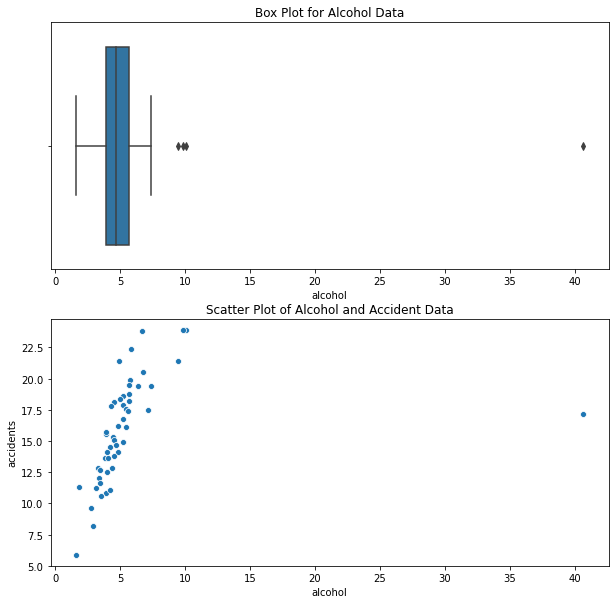

In [8]:
fig, ax = plt.subplots(2,figsize=(10,10))
sns.boxplot(crash['alcohol'], ax=ax[0])
sns.scatterplot(crash['alcohol'], crash['accidents'], data=crash, ax=ax[1])
ax[0].set_title('Box Plot for Alcohol Data')
ax[1].set_title('Scatter Plot of Alcohol and Accident Data')
plt.show()

### Question 4. Display and then Remove the one outlier row. You should now have 50 rows

In [9]:
print('Shape of data frame before removal: ', crash.shape, '\n')
print('Outlier in the alcohol column: ', crash['alcohol'].max(),'\n')
print('Row with outlier value:\n', crash[crash['alcohol'] > 15],'\n')
crash = crash[crash['alcohol'] <= 15] #Removal
print('Shape of data frame after removal: ', crash.shape, '\n')


Shape of data frame before removal:  (51, 10) 

Outlier in the alcohol column:  40.641999999999996 

Row with outlier value:
     accidents  speeding  alcohol  not_distracted  no_previous  ins_premium  \
39       17.2       7.1   40.642          17.472       16.016       905.99   

    ins_losses state     region   division  
39      153.86    PR  Territory  Territory   

Shape of data frame after removal:  (50, 10) 



## Question 5. Calculate the average speeding in usa and Northeast region using SQL

In [10]:
query = 'select avg(speeding)as \'Average speeding in the United States\' from crash'
result =  ps.sqldf(query)
print(result,'\n\n')
query = 'select avg(speeding)as \'Average speeding in the Northeast\' from crash where region =\'Northeast\''
result =  ps.sqldf(query)
print(result)

   Average speeding in the United States
0                                5.01944 


   Average speeding in the Northeast
0                            4.42475


## Question 6. Calculate the average alcohol for each region using SQL

In [11]:
query = 'select region as \'US Region\', avg(alcohol) as \'Average Alcohol\' from crash group by 1 order by 2 asc'
result =  ps.sqldf(query)
print(result,'\n\n')

   US Region  Average Alcohol
0  Northeast         3.980500
1       West         4.754077
2    Midwest         4.996917
3      South         5.414647 




## Question 7. Calculate the number of occurrences, mean, min, max of the speeding for each divison using SQL

In [12]:
query = 'select division as \'Speeding data by US Division\', count(speeding)as \'Count\', avg(speeding) as \'Average\','\
        ' min(speeding) as \'Minimum\', max(speeding) as \'Maximum\' from crash group by 1 order by 2'
result = ps.sqldf(query)
print(result)

  Speeding data by US Division  Count   Average  Minimum  Maximum
0              Middle Atlantic      2  5.446000    1.792    9.100
1           East South Central      4  4.533250    2.640    7.332
2           West South Central      4  6.333750    4.032    7.760
3           East North Central      5  4.106600    3.384    4.968
4                      Pacific      5  5.949400    4.200    9.450
5                  New England      6  4.084333    1.886    5.738
6           West North Central      7  4.293429    1.937    6.923
7                     Mountain      8  5.812250    3.496    8.346
8               South Atlantic      9  5.030444    2.006    9.082


## Question 8. Answer Question 7 but use Pandas functions

In [13]:
# what a powerful line of code!
# group data by division, apply aggreagates then show only speeding sorted by count.
print(((crash.groupby('division').agg(['count','mean', 'min', 'max']))['speeding']).sort_values('count'))

                    count      mean    min    max
division                                         
Middle Atlantic         2  5.446000  1.792  9.100
East South Central      4  4.533250  2.640  7.332
West South Central      4  6.333750  4.032  7.760
East North Central      5  4.106600  3.384  4.968
Pacific                 5  5.949400  4.200  9.450
New England             6  4.084333  1.886  5.738
West North Central      7  4.293429  1.937  6.923
Mountain                8  5.812250  3.496  8.346
South Atlantic          9  5.030444  2.006  9.082


### Question 9. Calculate the Standard deviation, Skew and Kurtosis for the accidents, speeding, alcohol for each region

In [14]:
from pandas import DataFrame
print("Accidents\n"   ,(crash.groupby('region').agg(['std','skew', DataFrame.kurt]))['accidents'])
print('\n\nSpeeding\n',(crash.groupby('region').agg(['std','skew', DataFrame.kurt]))['speeding'])
print('\n\nAlcohol\n' ,(crash.groupby('region').agg(['std','skew', DataFrame.kurt]))['alcohol'])


Accidents
                 std      skew      kurt
region                                 
Midwest    3.588988  0.950845  2.067092
Northeast  3.077453  0.777587  0.726713
South      4.537037 -1.125839  1.860064
West       3.325118  0.064819 -1.048692


Speeding
                 std      skew      kurt
region                                 
Midwest    1.537451  0.121197 -0.737061
Northeast  2.327773  1.051666  1.763520
South      2.220711  0.172035 -1.327699
West       1.803138  0.697441 -0.465455


Alcohol
                 std      skew      kurt
region                                 
Midwest    1.824432  2.093467  5.597372
Northeast  0.872950  0.764250  0.890501
South      1.773576  0.330988  2.125568
West       1.910356  1.159752  2.219220


## Question 10. Plot the histogram of accidents distribution for different region using 5 bins

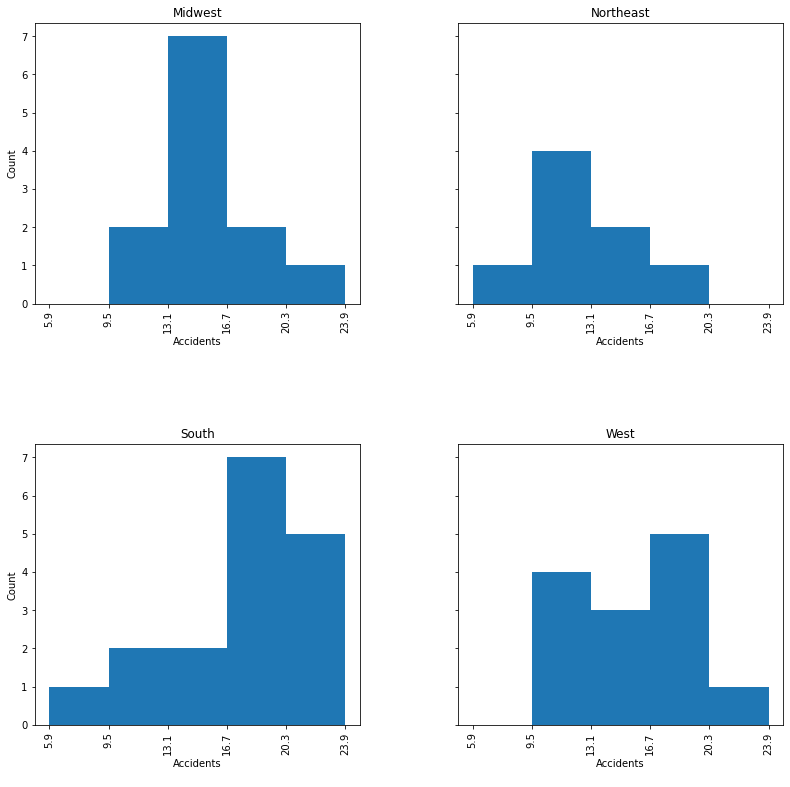

In [15]:
axis = crash['accidents'].hist(crash['region'], 
                               sharey=True, # share y so they do not have distorted plots in different scales
                               figsize=(13,13),  
                               bins=np.linspace(crash['accidents'].min(), crash['accidents'].max(), 6))

for ax in axis.flatten():
    ax.set_xlabel("Accidents\n")
    ax.set_ylabel("Count")
    ax.set_xticks(np.linspace(crash['accidents'].min(), crash['accidents'].max(), 6)) # x ticks match the bin delimiter!
    

### Question 11. How would you describe the accidents distribution for different region based on the Skew and Kurotsis?
(i.e. who has positive and negative skew and who has positive and negative Kurotsis)

<pre>
Accidents
           skew      kurt
region                                 
Midwest    0.950845  2.067092
Northeast  0.777587  0.726713
South     -1.125839  1.860064
West       0.064819 -1.048692

Taking into acount the Skew and Kurtosis for the Accidents by regions, one can state:
* Midwest   - Accident distribution skews right and accident data has more outliers than usual.
* Northeash - Accident distribution skews right but not as much as the Midwest, while having accident above average
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; outliers but also less than Midwest.
* South     - The only Region with a left skew in accident data and also having more accident outlier data than usual.
* West      - The accident data has a slight skew to the right and having less outliers than usual.

Final Note: When it comes to outliers, the kurtosis for Midwest denoted is it the region with most outliers in the
dataset, while the South group showed highest magnitude of skew. The data set for West showed lower than average 
outliers and best distribution from all Regions due to its skew being near zero.
<pre>

## Question 12. Calculate correlation of all the factors among themselves and determine which factors among speeding, alcohol and ins_premium will affect accidents the most?

In [16]:
crash.corr()

,accidents,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
accidents,1.000000,0.608632,0.850706,0.826209,0.956009,-0.174157,-0.025507
speeding,0.608632,1.000000,0.667377,0.585337,0.568831,-0.059254,-0.059624
alcohol,0.850706,0.667377,1.000000,0.730435,0.780696,-0.146921,-0.103849
not_distracted,0.826209,0.585337,0.730435,1.000000,0.745712,-0.157416,-0.068733
no_previous,0.956009,0.568831,0.780696,0.745712,1.000000,-0.119067,0.007872
ins_premium,-0.174157,-0.059254,-0.146921,-0.157416,-0.119067,1.000000,0.625381
ins_losses,-0.025507,-0.059624,-0.103849,-0.068733,0.007872,0.625381,1.000000


<pre>
Taking a look at the correlation of (accidens) vs (speeding, alcohol and ins_premium), one can notice that
alcohol has the highest positive correlation with accidents at 0.85, sugesting that people who consume 
alcohol are more prone to accidents than any other factor. Speeding omes in second place, also display a 
notable positive correlation with accidents at 0.6. ins_premium, on the other hand, has a slight negative 
correlation with accidents, implying that as the premiums get higher drivers have less accidents. One can 
especulate that drivers become more careful so the premium does not become even higher due to an accident,
but this correlation is too low (-0.17) to make any definite analysis. 
<pre>

### Now Load a different dataset (MPG dataset number 3)

In [17]:
mpg = pd.read_csv("mpg3.csv")
print(mpg.shape)
mpg.head()

(405, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,usa,ford torino


## Question 13: Check to see if there are any missing values. Fix the missing values by imputing value from the mean.

In [18]:
print('Is there data missing? \n',mpg.isnull().any())
print("\n")
print("Yes, there are missing values in mpg, horsepower, weight")
bad_mpg = mpg[np.isnan(mpg.mpg)]
print('\n\n** Missing rows of mpg data **\n', bad_mpg.mpg)
bad_hp = mpg[np.isnan(mpg.horsepower)]
print('\n\n** Missing rows of horsepower data **\n', bad_hp.horsepower)
bad_weight = mpg[np.isnan(mpg.weight)]
print('\n\n** Missing rows of weight data** \n', bad_weight.weight)

Is there data missing? 
 mpg              True
cylinders       False
displacement    False
horsepower       True
weight           True
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


Yes, there are missing values in mpg, horsepower, weight


** Missing rows of mpg data **
 35   NaN
Name: mpg, dtype: float64


** Missing rows of horsepower data **
 36    NaN
131   NaN
336   NaN
342   NaN
360   NaN
380   NaN
Name: horsepower, dtype: float64


** Missing rows of weight data** 
 53   NaN
Name: weight, dtype: float64


### Type your code here to fix the missing values by imputing value from the mean

In [19]:
mean_mpg = mpg['mpg'].mean()
mean_horsepower = mpg['horsepower'].mean()
mean_weight = mpg['weight'].mean()

mpg['mpg'] = mpg['mpg'].fillna(mean_mpg)
mpg['horsepower'] = mpg['horsepower'].fillna(mean_horsepower)
mpg['weight']= mpg['weight'].fillna(mean_weight)

print(mpg.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
